# Classification 

The linear regression model we have discussed in past chapters assumes that the output of model $y$ is quantitative. In many practical situations, the output  are classes or categorical. For example, training a model to detect a bank fraud based on the transcation is a binary classification task and the output takes values 0 or 1 (false or true). Let us say that we want to build a model which takes a person's vitals and symptoms as input features and returns the possible disease he is suffering. The output may be one of the most common disease in locality - say - pneumonia, cancer, malaria, dengue, healthy or other. In this case, we can't actually represent the output as number. If one were to assign 0 to healthy, 1 to pneumonia, 2 to cancer, 3 to pneumonia and so on, it is useless because 1 lies in middle of 0 and 2 but it is wrong to say that pneumonia is half or preliminary symptom of cancer. A different approach is required to model such situations. In this chapter our aim is to predict the categorical output of the model and this process in known as classification. In that sense, classification problem is same as the regression problem, except that the values that we want to predict are classes and not numnbers.

We will restrict our discussion to few fundamental classification problems in this chapter. The first one is logistic regression and we will focus on binary classification.

### Key points to remember

1. A classification problem requires that examples be classified into one of two or more classes.
2. A classification can have real-valued or discrete input variables like regression problems
3. A problem with two classes is often called a two-class or binary classification problem.
4. A problem where an example is assigned multiple classes is called a multi-label classification problem.
5. Logistic regression is a simplified treatment of binary classification problem. 

## Binary Classification

Let us first consider some example use cases where we may want to build a binary classification model to solve our difficulties.  In a goverment hospital like AIIMS, huge number of people come for treatment. Many serious patients need to be put on ICU. Let us say that every patient have 20 important health vitals which are being monitored in the hospital. This may include disease, bloood pressure, diabetes, blood group, heart rate, pulse rate and other health conditions associated with their medical report. 
Since the input population is very high and beds in ICU are very limited, the hospital may want to limit only very critical guests in ICU and less-risk guests in general ward. They may have a past history table of all guests visiting the hospital for 20 years. Thus, they may try to build a model that inputs these and other important health vitals of a patient and categorize him/her as 'critical' or 'not-critical'. We must understand that in such a cases, where even life of a patient is at risk, we may want to actually double-check the recommendation with a certified doctor, but we can show him the output of the model and help him make the assessment faster. This is an example of binary classification task. Similarly, in a production line of a factory many toys are made everyday. It may churn out around 100,000 toys daily. It is difficult to have human inspection of toys but instead some testing and video analysis of the toys can be used to find the defects in physical dimensions and working. Then a binary classification task may be used to decide which samples are defective and which ones are not. Similarly, when someone buys something online and makes a payment, it is pretty routine for banking authiorities such as RuPay or Mastercard or Visa to collect the different situations surrounding a transaction (such as user's past transcation pattern, amount of transcation, browser used, location of transcation (IP adress)) to decide whether the transaction is benevolent or suspecious. Depending on the legal setups in the country, the model is trained differenctly. When they doubt the transaction, they challenge the user with an OTP or call them on their phone to check if the transaction is genuine. These examples are trying to predict a binary outcome and hence considered as binary classsification problem.  

### Comparison to linear regression

At this stage, it is obvious to ask, whether we could do the same using linear regression also. In one sense, we can use a linear regression for a binary classification task. If the two classses are '0' and '1', we could have also drawn a line between the two and did a regression. If the output score of regression is between 0-0.5 it is a '0' class and if it is between 0.5-1 it is a '1' class. There is actually nothing wrong in this, however it may not work as well. In practise, a second approach is used. It is derived from linear regression and called as logistic regression. We will discuss its details later, but for now, just assume that logistic regression outputs only the class probabilities (pass probability) and hence the class with larger probability is the output class.

Let us consider another example to illustrate the same. If we have, as inputs of a model, the marks of candidates in mid-semester tests, their health, attendance, the amount of time spent daily on studies etc, we can build the following models to predict chances of passing final exam:

##### Model 1:
Linear Regression could help us predict the student’s final test score on a scale of 0 - 100. Linear regression predictions are continuous (numbers in a range). We could use the linear regression model to predict the score and if that score is less than 40, the student fails otherwise he passes.

##### Model 2: 
Logistic Regression could help use predict whether the student passed or failed. If the pass cut-off is 40, Logistic regression predictions are discrete (only specific values or categories are allowed). We can also view probability scores underlying the model’s classifications

The two approaches to are subtly different - predicting the score of 0 - 100 in exam versus predicting whether a person passes the test or not. In model 1, we are interested in minimizing the error in predicting the marks of a person. However, one may pass the exam simply by getting marks above 40. The  output of this pass prediction model would be PASS for anyone who has score greater than 40 and FAIL or 0 for anyone who has score less than 40. In other words, model 2 focuses on the performance of a student around 40 marks and should be able to discriminate sharply in the region of 40, so that anyone below 40 is a FAIL and anyone above 40 is a pass. 

Model 2 or logistic regression is built for discrimination of classes around 40 marks threshold. Model 1, on the other hand, is trying to predict marks correctly for all the guests. Although one may use it to find whether is pass or fail, the model is optimized to reduce the error in predicting marks for all guests. To see this visually, let us try to introduce the concept of decision boundary first.

### Decision boundry 

Decision boundry is the particular line which separates the region between $y=0$ and $y=1$ (or multiple classes in general). It doesnt need to be linear and could be any shape to fit the data. A decision boundary is the region of a problem space in which the output label of a classifier is ambiguous. The classifier will classify all the points on one side of the decision boundary as belonging to one class and all those on the other side as belonging to the other class. 

To understand the relative performance of model 1 and 2, let us consider how decision is made in the two, and how decision boundaries differ. In model 1, first the marks are predicted (0-100) and then a thresholding would be done (marks>40) to determine whether one is pass or fail. Thus, the model optimizes the linear surface of fit for the curve across 0-100. In model 2, given the inputs, the model tries to model pass or fail, hence, in terms of marks, the decision is crisply across 40 marks cutoff. Typically, the decision boundary is a plot among input features and a contour or surface dividing the region of different classes is shown. For a single variable (marks) as input, we next plot it with output on the y-axis.
Let us now try to plot the simple binary classification problem (pass or fail), the decision boundary of linear model and how the logistic or sigmoid function helps us reach closer to ideal decision boundary using some simple python plots.


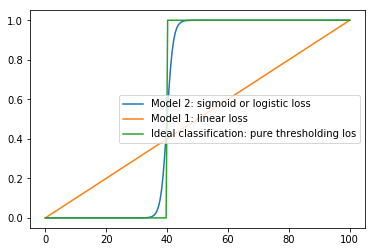

In [2]:
import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting core

#define a custom sigmoid function
# b is the point where sigmoid function switches from 0 to 1
# a defines the sharpness of slope of sigmoid around b
def sigmoid(z,a,b) : 
    return 1/(1 + np.exp(-b*(z-a)))

#use a numpy function to generate 200 linearly or uniformly spaced samples between 0 and 100.
z = np.linspace(0,100,200)

#plot the decision boundary of sigmoid with decision boundary around a=40
plt.plot(z, sigmoid(z,40,1),label='Model 2: sigmoid or logistic loss')
#linear mapping from z to [0,1] interval
plt.plot(z, z/100,label='Model 1: linear loss')
#ideal decision boundary for classification example
plt.plot(z, z>40,label='Ideal classification: pure thresholding los')
plt.legend()
plt.show()

In the above plot, we can actually observe that logistic or sigmoid loss function/ cost function is more sharper around the 40 mark. If we increase the value of parameter b, it will become more and more steeper around 40, hence better in performance than a linear function. 

Now, let us consider a two dimensional data. For simplicity, let us consider the data is linearly separable i.e. we can draw a linear boundary between the two classes. Let us write a simple python code to draw such synthetic data.

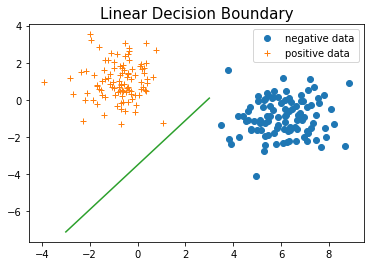

In [3]:
# Generate 2 classes of data
#create an identity matrix of size 2 to serve as unit covariance metrics of the data we are trying to generate.
S = np.eye(2)
#For both classes, we specify the mean and covariance and length of samples.
x01, x02 = np.random.multivariate_normal([6,-1], S, 100).T
x11, x12 = np.random.multivariate_normal([-1,1], S, 100).T

#Let us plot them
fig, ax = plt.subplots()
ax.plot(x01,x02, "o", label='negative data' )
ax.plot(x11,x12, "+", label='positive data')

#Let us draw a line that separates these two spaces. The coefficients are hand-curated.
xb = np.linspace(-3,3,100)
ax.plot(xb,  -3.5+1.2 *xb )

plt.legend()
plt.title("Linear Decision Boundary", fontsize=15)
plt.show()

Now, we will try to formally define the mathematics of binary logistic regression.



## What if we try linear regression model

Let us see the condition (1) visually by trying to fit a linear regression on a classification problem. We will generate some synthetic data to represent training samples. We generate a distribution of marks and obtain grades (marks>40 imply pass else fail). Now, we train a linear regression classifier to obtain the grade. If the output probability is greater than 0.5, we imply a pass else a fail.

A brief summary of how we generate data is given in comments. Don't worry if you don't follow it fully. The figures are more important in this case and illustrate important conclusion.

We will observe that the linear model's performance depends very heavily on the distribution of data points in the range 0-100. Even if sufficient points are given around cutoff marks (40), the model is unable to infer the right cutoff if the data distribution changes. In first approach, marks are uniformly distributed around 0-100 range. In second, they vary uniformly around range 35-85 while in third it varies uniformly in the range 0-45.


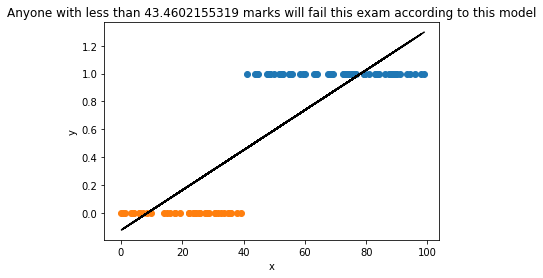

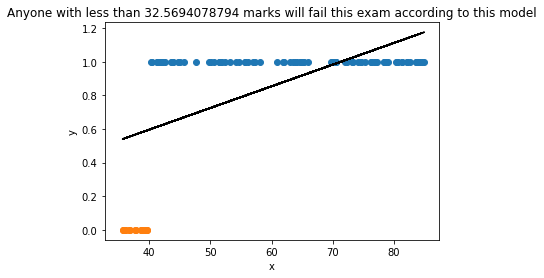

m and b values are: 0.0110395013753 -0.171335206716


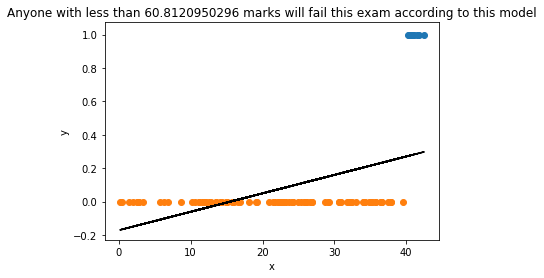

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

def best_fit_line(x,y):
    num=x.mean()*y.mean()- (x*y).mean()
    den=pow((x.mean()),2)- (x*x).mean()
    b1=num/den
    #print(m)
    b0=y.mean()-b1*x.mean()
    return b1, b0

x=np.random.rand(100,1)*100
y=x>40
m,b=best_fit_line(x,y)
Y_pred = m * x + b 
max_Y_pred_to_fail= (0.50-b)/m
plt.figure()
ax = plt.axes()
ax.scatter(x[np.where(y==1)], y[np.where(y==1)])
ax.scatter(x[np.where(y==0)], y[np.where(y==0)])
ax.plot(x, Y_pred,color='black')
ax.axis('tight')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Anyone with less than '+ str(max_Y_pred_to_fail)+ ' marks will fail this exam according to this model')
plt.show()


x=np.random.rand(100,1)*50+35
y=x>40
m,b=best_fit_line(x,y)
Y_pred = m * x + b 
max_Y_pred_to_fail= (0.50-b)/m
plt.figure()
ax = plt.axes()
ax.scatter(x[np.where(y==1)], y[np.where(y==1)])
ax.scatter(x[np.where(y==0)], y[np.where(y==0)])
ax.plot(x, Y_pred,color='black')
ax.axis('tight')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Anyone with less than '+ str(max_Y_pred_to_fail)+ ' marks will fail this exam according to this model')
plt.show()



x=np.random.rand(100,1)*43
y=x>40
m,b=best_fit_line(x,y)
Y_pred = m * x + b 
print("m and b values are:",m,b)
max_Y_pred_to_fail= (0.50-b)/m
plt.figure()
ax = plt.axes()
ax.scatter(x[np.where(y==1)], y[np.where(y==1)])
ax.scatter(x[np.where(y==0)], y[np.where(y==0)])
ax.plot(x, Y_pred,color='black')
ax.axis('tight')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Anyone with less than '+ str(max_Y_pred_to_fail)+ ' marks will fail this exam according to this model')
plt.show()



## What is Logistic Regression?


The scientists try to approach the classification problem with a jugaad (hack) question: “How
can we use linear regression to solve this?”. Let p(x) denote the probability of x belonging to class 1. Let us consider the following options:

1. The most obvious idea is to let p(x) be a linear function of x. We already discussed some downfalls of this approach. Apart from the issue we discussed earlier, another conceptual problem here is that p must be between 0 and 1, and linear functions are unbounded. p(x)<0 and p(x)>1 will appear as result of linear model and they have no explanation.
2. The next most obvious idea is to let log p(x) be a linear function of x, so that changing an input variable multiplies the probability by a fixed amount. The problem is that logarithms are unbounded in only one direction, and linear functions are not.
3. Finally, the easiest modification of log p which has an unbounded range is the logistic (or logit) transformation, $\log \frac{p}{(1−p)}$ . We can make this a linear function of x without fear of nonsensical results. (Of course the results could still happen to be wrong, but they’re not guaranteed to be wrong.)

The logistic regression model is a supervised classification model, which uses the techniques of the linear regression model in the initial stages to calculate the logits and then apply sigmoid function to create sharp classification boundary. The Logits also called as scores. These are just the outputs of the linear model i.e. weighted sum of input variables. The Logits will change with the changes in the calculated weights.
The idea behind the Logistic Regression is to find a relationship between features and probability of particular outcome. 

### Logit function

We introduced the concept of sigmoid in the last figure to show how it produces a sharper decision boundary around the pass marks, hence the model is more sensitive to errors around that point than others in range 0-100. However, there is another problem, in general, with a linear model. Mathematically, the input values to the model ($X_1,X_2$...) are in the range $[-\inf,+\inf]$ and the output $Y$ also varies in the same range $[-\inf,+\inf]$. However, in a classification situation, we want the model to assign probability score on class membership. For some values of inputs, the linear regression model may offshoot $y$ to values greater than 1 or less than 0, which make no sense in this case. A lot of initial research in classification was done with this goal i.e. to find a function that maps from $[-\inf,+\inf]$ to $[0,1]$. The first work around 1938 proposed a probit function that mapped a continuous exponential distribution and integrated it over the range $[-\inf,+\inf]$ to $[0,1]$. Then, in 1944, logistic model was discovered, which provides a simpler mapping and has some interesting properties which make it simple for implementation.

Let us say that the output variable $y$ was to be a probability functionin range $[0,1]$. $y$ represents the probability that the output belongs to class '1'. The odds of the output being class '1' is defined as the ratio of probability of class being '1' over class being '1'.The odds signifies the ratio of probability of success to probability of failure. 
$$odds('1')=\frac{Pr['1']}{Pr['0']}= \frac{y}{1-y}$$
The logit is actually defined as the logarithm of odds ratio.
$$logit('1')=log-odds('1')=\log(\frac{y}{1-y})$$
Since $y\in[0,1]$,$odds('1')\in[0,\inf]$ and $logit('1')\in[-\inf,+\inf]$

In logistic regression, we use linear regression under the hoods to actually map $logit('1')$ to the linear combination of input variables:

$$logit('1')=\beta^T x = \beta_0 + \beta_1 X_1 + \beta_2 X_2 ....$$
or
$$\log(\frac{y}{(1-y})=\beta^T x$$
or equivalently, by taking the inverse of the above function, we have 
$$y=\frac{e^{(\beta x)}}{1+e^{(\beta^T x)}}$$


### Logistic Regression & Sigmoid Function
The logistic regression (actually classification) model can also be represented as follows:
\begin{align*}& y = g(z) = g ( \beta^T x ) \newline & z = \beta^T x \newline & g(z) = \dfrac{1}{1 + e^{-z}}\end{align*}
The function $g(z)$ is called as logistic function. It has a characteristic "S"-shaped curve or sigmoid curve, with input varying from $[-\inf,+\inf]$ to [$0,1$] or $[-1,1]$ depending on the nomenclature. Hence, it is also called as sigmoid function. There are also other "S"-shaped curves with similar mappings such as tanh or error function. The $g$ function is also called as activation function, a terminology derived from biological neural networks, which we will elaborate in later chapters. The activation function can be a linear or non-linear function. However, when non-linearity is present, it improves the representation power of the logistic regression model to acheive sharp decision boundaries (as shown previously). If the activation function is linear, the entire model can be shown to be same as a linear regression model. 


Some characteristics of logistic function are discussed next:
1. The logistic function returns a real-valued output.
2. The derivative of logistic function can be calculated easily using the following relation:
$$g'(z)= \frac{d}{dz} (\frac{1}{1 + e^{-z}}) = \frac{-1}{(1+e^{-z})^2} * (-1*e^{-z})= \frac{1}{(1+e^{-z})}\frac{(1+e^{-z})-1}{(1+e^{-z})} = g(z)(1-g(z))$$
This properties is very helpful to calculate derivative (quickly) for the use of gradient descent algorithms. 
3. The logistic function has the symmetry property: $1-g(z)=g(-z)$
4. The logistic function is a continuous approximation to the unit step function and its integral is actually called as softplus function, which is a continuous approximation to rectifier or REctified Linear Unit (RELU). 
$$G(z)=\int_{-\inf}^{z} g(z) dz = \int_1^{1+e^z} \frac{1}{u}du$$
(substituting $1+e^z=u$ and $e^z dz = du$)$$G(z)= log(1+e^z)$$
The softplus function is a continuous approximation to RELU function, which is described as follows:
$$RELU(z)=max(0,z)$$
Although we will not discuss RELU in more details here, it must be noted that RELU is used in a wide variety of machine learning models based on deep neural networks because its gradient (i.e. unit function) is large for all values of $z>0$, hence it speeds up the gradient descent.
The earlier literature and research was more focussed on logistic function while current research, particularly based on deep neural architecture tends to be focused on RELU as activation function. We will continue to discuss the logistic function for now, since it provides solid foundation of classification problem.


5. For large values of $z$, $g(z)$ tends to 1. For negative values of $z$, function approaches to $0$.

    a. if $z=0$ then $g(0)=0.5$
    
    b. if $z \ge 0$ then $g(z) \ge 0.5$
    
    c. if $z < 0$ then $g(z) < 0.5$

6. To obtain the output as a class, the following conditions holds true:

\begin{align*}& \beta^{\rm T} x \geq 0 \Rightarrow y = 1 \newline& \beta^ {\rm T} x < 0 \Rightarrow y = 0 \newline\end{align*}

For multinomial classification, we can expand the logistic model to handle multiple classes or else we can use a different function called as softmax function. We will discuss that in later sections. We shall now write a python code to draw sigmoid function:

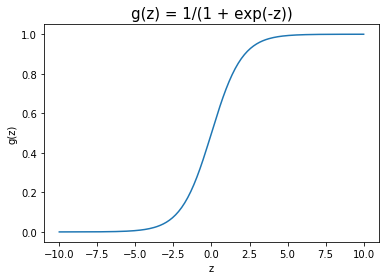

In [5]:
z = np.linspace(-10,10,200)
plt.plot(z, sigmoid(z,0,1))
plt.title("g(z) = 1/(1 + exp(-z))", fontsize=15)
plt.xlabel("z")
plt.ylabel("g(z)")
plt.show()

## Cost function 
Now, we shall discuss the cost function we shall minimize for logistic regression. 
The cost function for linear regression is to minimize the mean square error (MSE) $J(\beta)$. 
\begin{align*}& J(\beta) = \dfrac{1}{n} \sum_{i=1}^n \mathrm{Cost}(h_\beta(x^{(i)}),y^{(i)}) \end{align*}
The cost function for MSE loss is:
$$J(\beta) = \sum (y_i - g(\beta^T x))^2$$
Fist of all, let us consider the reasons to not use the mean square error function as cost function for logistic regression: 
1. If we use the same cost function for logistic regression, it will give a non convex functon of perameters ($\beta$). Gradient descent will converge to global mimimum only if the curve is convex in shape. A least-squares cost function using the sigmoid function can have multiple local minimum.
2. The MSE loss is not suitable for classification problems where we want to maximize the class membership of each point to its appropriate class. 
The cost function for logistic regression is not done using MSE but using maximum likelihood estimation:


## Likelihood

The actual positive labels have correct probabilities near one, while the actual negative labels have correct probability near zero. The actual probability of a positive label to be in positive class is defined as:

$$P(y=1 | x_{positive})=g_{\beta}(x_{positive})$$

Simlarly for negative obeject:

$$P(y=0 | x_{negative})=1-g_{\beta}(x_{negative})$$

Let us assume that our data was generated independently. The  likelihood of actually classifying the objects into positive class is the product of the likelihood of each positive object i.e. $\prod_{positive}g_{\beta}(x)$. Similarly, the  likelihood of actualy classifying the objects into negative class is the product of  the likelihood of each negative object i.e. $\prod_{negative}(1-g_{\beta}(x))$.

Therefore, the likelihood of correctly classifying each object in data is represented by:

$$L(\beta)=\prod_{positive}g_{\beta}(x)\prod_{negative}(1-g_{\beta}(x))$$
For positive examples, $y_i=1$ while $y_i=0$ for negative examples. Hence, we can re write the above product more generally as:

$$L(\beta)=\prod_{i=0}^n g_{\beta}(x^{(i)})^{y^{(i)}}(1-g_{\beta}(x^{(i)}))^{(1-y^{(i)})}$$
This function is called as likelihood function. Only one of the two terms is non-zero for any given label. 
Our goal is to maximize this likelihood function or minimize the cost function given by -$L(\beta)$. In intermediate algebra, we learn that if a function $f(x)$ has a minima at $x_{min}$, the function $g(f(x))$ also has a minima at $x_{min}$ if $g(x)$ is a monotonicly increasing function. Therefore, to maximize the Likelihood function, we can instead maximize the log of likelihood function as follows:

$$l(\beta)=\log L(\beta)=\log \prod_{i=0}^n g_{\beta}(x^{(i)})^{y^{(i)}}(1-g_{\beta}(x^{(i)}))^{(1-y^{(i)})}$$

Note: $\log (ab)=\log a+ \log b$ and $\log a^b=b \log a$

$$l(\beta)=\sum_{i=0}^n[ {y^{(i)}} \log g_{\beta}(x^{(i)})+(1-y^{(i)}) \log (1-g_{\beta}(x^{(i)}))]$$

We can define the cost function as negative of log-likelihood function.

$$J(\beta)=-l(\beta)=\sum_{i=0}^n[- {y^{(i)}} \log g_{\beta}(x^{(i)})-(1-y^{(i)}) \log (1-g_{\beta}(x^{(i)}))]$$

This function will give the total error/ cost of prediction. Cost function is represented as mean cost and gives us a suitable matric that how well our logitic regression model is performing. Therefore, 

$$J(\beta)=\frac{1}{n}\sum_{i=0}^n[- {y^{(i)}} \log g_{\beta}(x^{(i)})-(1-y^{(i)}) \log (1-g_{\beta}(x^{(i)}))]$$

This objective function measures how better the prediction matches the actual classes and $J(\beta)$ can be viewed as average log error in classification of labels by the logistic classifier. 

NOTE: It may appear that we used a different loss function for linear regression and another one for logistic regression. However, in the case of linear regression, the likelihood is given by a gaussian distribution of mean $\beta^T x$, hence the log-likelihood function actually maps to MSE loss function.

In [6]:
#Let us define the cost function for the logistic regression model first.
def cost(beta, X, y):
    beta = np.matrix(beta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * beta)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * beta)))
    return np.sum(first - second) / (len(X))
print("please try to use the example of passing marks and two different beta values to show cost function and the performance")

please try to use the example of passing marks and two different beta values to show cost function and the performance


## Gradient Descent

Let us first calculate the derivate of the cost function $J(\beta)$ with regard to beta parameters:

$$
\frac{\partial J(\beta)}{\partial \beta_j}  = 
\frac{\partial}{\partial \beta_j} \,\frac{-1}{m}\sum_{i=1}^m 
\left[ y^{(i)}\log\left(g_\beta \left(x^{(i)}\right)\right) +
(1 -y^{(i)})\log\left(1-g_\beta \left(x^{(i)}\right)\right)\right]$$
This can be simplified using the properties: 

$\frac{\partial}{\partial \beta_j}(A+B)=\frac{\partial}{\partial \beta_j}(A)+\frac{\partial}{\partial \beta_j}(B)$, $\frac{\partial}{\partial \beta_j}c*A(\beta)=c*\frac{\partial}{\partial \beta_j}A(\beta)$ and $g'(z)= g(z)(1-g(z))$

Let us first compute partial derivative of $g_\beta(x)$
$$\frac{\partial}{\partial \beta_j}g_{\beta}(x)= g_{\beta}(x)(1-g_{\beta}(x))*\frac{\partial}{\partial \beta_j}(\beta_0+\beta_1*X_1+...\beta_i*X_i+...\beta_n*X_n)$$
Hence, 
$$\frac{\partial}{\partial \beta_j}g_{\beta}(x)=g_{\beta}(x)(1-g_{\beta}(x))*(0+0+...X_j+0+...)=g_{\beta}(x)(1-g_{\beta}(x))*X_j$$
We get:



$\begin{align}
  {\partial \over \partial \beta_j} J(\beta) &= 
   \,\frac{-1}{m}\,\sum_{i=1}^m 
\left[ 
y^{(i)}\frac{\partial}{\partial \beta_j}\log\left(g_\beta \left(x^{(i)}\right)\right) +
(1 -y^{(i)})\frac{\partial}{\partial \beta_j}\log\left(1-g_\beta \left(x^{(i)}\right)\right)
\right]\\
  &= - {1 \over m} \sum_{i=1}^m y^{(i)}\, {x_j^{(i)} \over g_\beta(x^{(i)})} g_\beta(x^{(i)})(1-g_\beta(x^{(i)}))X_j^{(i)} + (1-y^{(i)}) {x_j^{(i)} \over 1 - g_\beta(x^{(i)})} (-g_\beta(x^{(i)})(1-g_\beta(x^{(i)})))X_j^{(i)} \\
    &= - {1 \over m} \sum_{i=1}^m ( y^{(i)}\,(1-g_\beta(x^{(i)})) - (1-y^{(i)}) g_\beta(x^{(i)}) ) X_j^{(i)} \\
    &= - {1 \over m} \sum_{i=1}^m \left( y^{(i)} - y^{(i)} g_\beta(x^{(i)}) - g_\beta(x^{(i)}) + y^{(i)} g_\beta(x^{(i)}) \right) X_j^{(i)} \\
    &= {1 \over m} \sum_{i=1}^m \left(g_\beta(x^{(i)}) - y^{(i)} \right) X_j^{(i)}
  \end{align}$


Let us recall the general form of gradient descent.

\begin{align*}& Repeat \; \lbrace \newline & \; \beta_j := \beta_j - \alpha \dfrac{\partial}{\partial \beta_j}J(\beta) \newline & \rbrace\end{align*}

Inserting the value of partial derivative, we get the following:


\begin{align*} & Repeat \; \lbrace \newline & \; \beta_j := \beta_j - \frac{\alpha}{m} \sum_{i=1}^m (h_\beta(x^{(i)}) - y^{(i)}) X_j^{(i)} \newline & \rbrace \end{align*}





### Vectorized Logistic Regression & Vectorized Gradient Descent

As mentioned in earlier chapters, we use vectorization to be able to parallelize the computations and train models in smaller time. 
Let us now write a vectorized form of logistic regression and gradient descent.
\begin{align*} & h = sigmoid(X\beta)\newline & J(\theta) = \frac{1}{n} \cdot \left(-y^{\rm T}\log(h)-(1-y)^{\rm T}\log(1-h)\right) \end{align*}

$$\beta := \beta - \alpha {1 \over m} \sum_{i=1}^m [(h_\beta(x^{(i)}) - y^{(i)}).x^{(i)}]$$

$$\beta := \beta - \alpha {1 \over m} X^T (g(X\beta) - y)$$








In [7]:
def gradient(beta, alpha, x , y):    
    m = x.shape[0]
    g = sigmoid(np.matmul(x, beta),0,1)
    grad = np.matmul(x.T, (g - y))/m ;
    beta = beta - alpha * grad
    return beta

### Decision boundary for logistic regression

The decision boundary for logistic regression would be the curve corresponding to probability score y to be 0.5.

$$y = g_\beta (x) =0.5$$

Let us consider that for a single input variable case:

$$g (\beta_0+\beta_1x_1) = 0.5$$

Hence, $\beta_0+\beta_1x_1=0$ or $x=-\beta_0/\beta_1$. This is a line parallel to y axis.

Now, let us consider the example with two cases:
$  e^{(\beta_0+\beta_1x_1 +\beta_2 x_2)}=1$
Hence, $\beta_0+\beta_1x_1 +\beta_2 x_2=0$

$$x_2= -(\frac{\beta_0+\beta_1x_1}{\beta_2})$$

We can notice that above is the equation of a line in two dimensions. This equation represents the decision line (as it is based on threshold of making prediction) and the decision surface of logistic regression is a straight line in two dimensions also. In general, we can understand that the decision surface of logistic regression is a hyperplane in higher dimensions. 

Let us consider a python example and draw the hyperplane for some synthetic dataset. We first generate a sample dataset with two input variables x1 and x2. Then, we generate synthetic labels. 

In [8]:
# Generate 2 classes of data
# create an identity matrix of size 2 to serve as unit covariance metrics of the data we are trying to generate.
S = np.eye(2)
#For both classes, we specify the mean and covariance and length of samples.
x01, x02 = np.random.multivariate_normal([4,-1], S, 100).T
x11, x12 = np.random.multivariate_normal([-1,1], S, 100).T
x01=x01.reshape(100,1)
x02=x02.reshape(100,1)
x11=x11.reshape(100,1)
x12=x12.reshape(100,1)

x1=np.concatenate((x01, x02), axis=1)
x2=np.concatenate((x11, x12), axis=1)
y1=np.zeros((100,1))
y2=np.ones((100,1))
x0=np.ones((200,1))
y=np.concatenate((y1, y2), axis=0)
x_temp=np.concatenate((x1, x2), axis=0)
x=np.concatenate((x0,x_temp),axis=1)
print("sample input values of X (X0,X1,X2) are:",x[1,:])


sample input values of X (X0,X1,X2) are: [ 1.          4.15076886  0.25697695]


[[ 6.50353535 -4.06295805  1.83374843]]


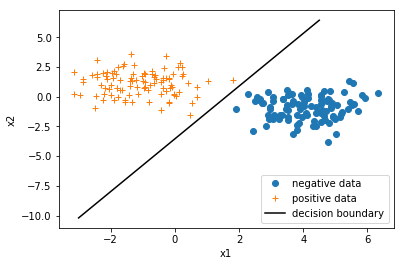

In [9]:
#initialize beta with zero values
beta = np.zeros(3)
beta=beta.reshape(3,1)

#calculate beta values iteratively using gradient descent.
for i in range(4000):
    beta=gradient(beta,0.5, x, y)
    
print(beta.T)

x1=np.arange(-3,5, .5)
x2=-(beta[0]+beta[1]*x1)/beta[2]
fig, ax = plt.subplots()
ax.plot(x01,x02, "o", label='negative data' )
ax.plot(x11,x12, "+", label='positive data')
plt.plot(x1, x2, c='k', label='decision boundary') 

plt.xlabel('x1') 
plt.ylabel('x2') 
plt.legend() 
plt.show()



## Regularized Logistic regression

Like linear regression, regularization can be introduced in logistic regression to reduce overfitting. A L1 or L2 norm parameter can be added to the cost function. For L2 norm (which is more commonly used), the cost function will have an additional term of  $\lambda * w^2$ while the gradient of cost as well as update step in gradient descent will now have an additional term corresponding to $\lambda * w$



# Multinomial logistic regression

Binary classification is quite useful in predictions with a binary goal, such as spam vs not spam or tumor vs not tumor. But not every problem fits the mold of binary classification. Sometimes we encounter a problem where each example could belong to one of the K classes. Multinomial logistic regression is the generalization of the logistic regression for such classification tasks.

Before, we move forward, let us discuss one simple scheme to mathematically represent the output in one of K classes. 

## One hot encoding 

Encode means to convert some value to a machine-understandable code. If the output y (or, it could be any of the feature input in x) belongs to one of K classes, we want to represent this information in some useful way, to be used for model training purposes.

Let us say that output variable belongs to one of three categories: red, green and yellow (K=3). In label encoding, every label is represented by a number to represent that category (1 for red, 2 for green and 3 for yellow). 
Let us say, we have encoded the set of color names into numerical data. This is actually categorical data and there is no relation, of any kind, between the rows (i.e Number 1 2 and 3). Now, the problem arises, as there are different numbers in the same column, computer will misinterpret the data to be in some sortof order, 1 < 2 < 3. Unfortunately, this is not the scenario here. 

| Color     |  Price   |  
| -------   |--------: | 
| 1         |  \$8.0   | 
| 2         |\$7.9     |   
| 3         |\$9.0     |

One approach to solve this dilemma is to use one-hot encoding. Instead of a single number representing the categorical variable y, it is now represented by a vector or embedding of size K such that, for each class membership, all but one of the embedding values are 1.

Let us create a simple python code to generate one hot encoding for y labels which are categorical in nature. 

In [25]:
from numpy import argmax

y = ['R','G','Y','R','R','G']
print("original y: "+str(y))
Universe=set(y)
label_codes =dict((c, i) for i, c in enumerate(Universe))
y_label_encode=[label_codes[yy] for yy in y]

print("Label encoder output: "+str(y_label_encode))
onehot_encoded = list()
for value in y_label_encode:
    letter = [0 for _ in range(len(Universe))]
	letter[value] = 1
	onehot_encoded.append(letter)
print("One Hot encoder output: "+str(onehot_encoded))

original y: ['R', 'G', 'Y', 'R', 'R', 'G']
Label encoder output: [2, 1, 0, 2, 2, 1]
One Hot encoder output: [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 1, 0]]


In [26]:
x= np.array([[1.1, 0.01],[1.1, 3.3],[-2.1, -2.3],[-4.5, 1.5]])

beta = np.array([[0.2, 0.1, 0.4],[0.3, 0.2, 0.1]])

b = np.array([0.1, 0.008, 0.01])

def z_input(x, beta, b):
    return (x.dot(beta) + b)

z = z_input(x, beta, b)
print('net input:\n', z)

net input:
 [[ 0.323  0.12   0.451]
 [ 1.31   0.778  0.78 ]
 [-1.01  -0.662 -1.06 ]
 [-0.35  -0.142 -1.64 ]]


## softmax

Our input X is a $m$ dimensional input with n training samples represented by $ \underset{n \times m}{X}$ where each training sample has been vertically stacked. $x_i$, as here row vector has chosen and matrix $ \underset{n \times k}{\beta}$. Instead of obtaining a single valued output y, we will have K outputs, each for predicting the output membership score in one of the K classes. The variable $\beta_Tx+\beta_0$ will have values in range $-\inf,+\inf$. Thus, we need to define a softmax function which can map K parallel values in range $-\inf,+\inf$ to $[0,1]$. We have k different set of $\beta$ values to calculate a representative score estimating the likeliness of the sample belonging to $i$th class. All these outputs are finally applied to a softmax function which maps them to class membership probabilities.

$$Y = \text{softmax}(z) = \text{softmax}(\beta^T X)$$

Before we design any classifier to map these scores to class probability, let us enumerate the desired properties. We would like to have the output values to 
1. contain only non-negative values, to be a valid probability distribution.
2. And sum up to 1.

Like the logistic regression case, to map the scores to a positive value in $[0,\inf]$, we can use exponential transform. To normalize the values i.e. to ensure that they add up to 1, we can divide them by the sum. 
Softmax is a vector function: it takes a vector as an input and returns another vector. 

$$\text{softmax}(\boldsymbol{z}) = \frac{e^{\boldsymbol{z}} }{\sum_{i=1}^k e^{z_i}}$$

Let us compute softmax of a simple input vector using this equation.

In [9]:
import math
import numpy as np

def softmax(a):
  return np.exp(a) / np.sum(np.exp(a))

a = np.array([1, 2, 3])
print("Input vector a=",a)
print("Output of softmax is=",softmax(a))

Input vector a= [1 2 3]
Output of softmax is= [0.09003057 0.24472847 0.66524096]


### Numerical unstability of the softmax function

The quality of the softmax function is that it takes N dimentional vector as an input and given N dimentional vector as an output which sums up to 1. However, the computations become impossible to perform, even on a high-end machine, in the naive manner. Let us explore an example below:

In [36]:
import math
import numpy as np

def softmax(a):
  return np.exp(a) / np.sum(np.exp(a))

a = np.array([1000,1001, 1002])
print("Input vector a=",a)
print("Output of softmax is=",softmax(a))

Input vector a= [1000 1001 1002]
Output of softmax is= [nan nan nan]


/Users/z001s97/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [37]:
np.exp(a)

array([inf, inf, inf])

We can see that numpy returns positive infinity for too large values. In this case, both numerator and denominator becomes inifity, and numpy returns nan as an output of softmax function. 

There is a nice approach to compute the exact same function with a simple property of softemax function. Softmax regression has an unusual property that it has a “redundant” set of parameters. Suppose we take each of our parameter vectors $\beta^{(j)}$, and subtract some constant vector $\theta$ from it, so that every $\beta^{(j)}$ is now replaced with $\beta^{(j)}− \theta$ (for each $j=1,…,K$). Prediction of our hypothesis now is

\begin{align}
softmax(x)
&= \frac{\exp((\beta^{(k)}-\theta)^\top x^{(i)})}{\sum_{j=1}^K \exp( (\beta^{(j)}-\theta)^\top x^{(i)})}  \\
&= \frac{\exp(\beta^{(k)\top} x^{(i)}) \exp(-\theta^\top x^{(i)})}{\sum_{j=1}^K \exp(\beta^{(j)\top} x^{(i)}) \exp(-\theta^\top x^{(i)})} \\
&= \frac{\exp(\beta^{(k)\top} x^{(i)})}{\sum_{j=1}^K \exp(\beta^{(j)\top} x^{(i)})}.
\end{align}

Thus, if we can substract all the elements in the vector by a constant value, we may be able to compute softmax for vectors where naive approach didn't work. Now, we end up with the question - how to compute the constant value? This answer is fairly straight forward. Let us choose the largest value in the group. If other values are of the same order, we will get significant values for them in softmax output. If they are too small, the exponent may go to $e-\inf$ or simply $0$. In either case, we will be able to get an approximately correct answer. 

$$a_i = \frac{e^{z_i}}{\sum_{j=1}^N e^{z_j}} = \frac{e^{z_i}e^{-Q}}{\sum_{j=1}^N e^{z_j} e^{-Q}}
= \frac{e^{z_i - Q}}{\sum_{j=1}^N e^{z_j - Q}}$$

Where $Q = max(z_1, z_2, \dots, z_N)$. This property makes the highest value of $z_j - Q$ to be zero and less than 0 for others. So the values of $e^{z_j - Q}$ are restricted from 0 to 1, which should be more appropriate for division.


In [38]:
import math
import numpy as np

def softmax(a):
  return np.exp(a-max(a)) / np.sum(np.exp(a-max(a)))

a = np.array([1000, 1001, 1002])
print("Input vector a=",a)
print("Output of softmax is=",softmax(a))

Input vector a= [1000 1001 1002]
Output of softmax is= [0.09003057 0.24472847 0.66524096]


## Cross entropy Loss function

Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .019 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0. It is also called logarithmic loss, log loss or logistic loss.

Cross-entropy loss is used when adjusting model weights during training. The aim is to minimize the loss


## Derivative of Softmax


$$ \frac{\partial p_i}{\partial z_j} = \frac{\partial  \frac{e^{z_i}}{\sum_{k=1}^N e^{z_k}}}{\partial z_j}$$

From quotient rule we know that for $f(x) = \frac{g(x)}{h(x)}$ partial derivative will be $\frac {\partial} {\partial x} f(x) = \frac{ g\prime(x)h(x) - h\prime(x)g(x)}{h(x)^2}$

$\frac{\partial}{\partial z_j} e^{z_i}$ will be $e^{z_i}$ if $i=j$ otherwise it will be $0$. $\frac{\partial}{\partial z_j} \sum_{k=1}^N e^{z_k}$ will be $e^{z_j}$

if $i=j$
$$ \frac{\partial  \frac{e^{z_i}}{\sum_{k=1}^N e^{z_k}}}{\partial z_j}= \frac{e^{z_i} \sum_{k=1}^N e^{z_k} - e^{z_j}e^{z_i}}{\left( \sum_{k=1}^N e^{z_k}\right)^2} \\
= \frac{e^{z_i} \left( \sum_{k=1}^N e^{z_k} - e^{z_j}\right )}{\left( \sum_{k=1}^N e^{z_k}\right)^2} \\
= \frac{ e^{z_j} }{\sum_{k=1}^N e^{z_k} } \times \frac{\left( \sum_{k=1}^N e^{z_k} - e^{z_j}\right ) }{\sum_{k=1}^N e^{z_k} } \\
$$
-formation content of a random variable to be in the class being $\log\left ( \frac {1} {p} \right)$ is also called surprisal fo an individual outcome, which can be rewrittin by using property of log funcation, as $-\log (p)$.-prediction from the true distribution.

In [55]:
def cross_entropy(p, y):
    return - np.sum(np.log(p) * (y), axis=1)

L = cross_entropy(smax, y_one_hot)
print('Cross Entropy L(p,y) is:', L)

Cross Entropy L(p,y) is: [1.08276445 1.30950391 1.21415925 2.20888096]


In [54]:
def cost(p, y):
    return np.mean(cross_entropy(p, y))

J_cost = cost(smax, y_enc)
print('Cost: ', J_cost)

Cost:  1.4538271420080695


## Derivative of Cross Entropy Loss 

$$ L = - \sum_i y_i log(p_i) \\
\frac{\partial L}{\partial z_i} = - \sum_k y_k \frac{\partial log(p_k)}{\partial z_i }\\
= - \sum_k y_k \frac{\partial log(p_k)}{\partial p_k} \times \frac{\partial p_k}{ \partial z_i}\\
= - \sum y_k \frac{1}{p_k} \times \frac{\partial p_k}{\partial z_i}$$


$$ \frac{\partial L}{\partial z_i}  = -y_i(1-p_i) - \sum_{k\neq i} y_k \frac{1}{p_k}(-p_k.p_i) \\
= -y_i(1-p_i) + \sum_{k \neq 1} y_k.p_i \\
= - y_i + y_ip_i + \sum_{k \neq 1} y_k.p_i \\
= p_i\left( y_i +  \sum_{k \neq 1} y_k\right) - y_i \\
= p_i\left( y_i +  \sum_{k \neq 1} y_k\right)  - y_i$$

$y$ is a one hot encoded vector for the labels, so $\sum_k y_k = 1$, and $y_i +  \sum_{k \neq 1} y_k = 1$. Therefore we have,

$$\frac{\partial L}{\partial z_i} = p_i - y_i$$

Source: https://deepnotes.io/softmax-crossentropy


## numerical estability of lose function

Similar to logistic regression, the minimize the negative log likelihood of the correct class can also be represented as performing Maximum Likelihood Estimation. The attempts to maximize the log-likelihood given to the correct labels. 

The reason for taking the negative of the logarithm of the likelihood are it is more convenient to work with the log, because the log-likelihood of statistically independant observation will simply be the sum of the log-likelihood of each observation. we usually prefer to write the objective function as a cost function to minimize.


$$\begin{align*}
\text{L} & = \sum_{i=1}^{K} -y_i \text{log}(p_i) \\
         & = \sum_{i=1}^{K} -y_i \text{log} \left (  \frac{e^{z_i}}{\sum_{j=1}^N e^{z_j}}   \right ) \\
         & = \sum_{i=1}^{K} -y_i \text{log} \left ( \frac{e^{z_i + Q}}{\sum_{j=1}^N e^{z_j + Q}} \right ) \\
\end{align*} $$



\begin{align*}
\text{L} & = \sum_{i=1}^{K} -y_i \left [ \log \left ( e^{z_i + Q} \right ) -
                                 \text{log} \left (\sum_{j=1}^M e^{z_j + Q} \right ) \right ] \\
         & = \sum_{i=1}^{K} -y_i \left [ z_i + Q -
                                 \text{log} \left (\sum_{j=1}^M e^{z_j + Q} \right ) \right ] \end{align*}
                                 
Work to be done: explain now how it is numerically stable                            
Helpful Source: http://saitcelebi.com/tut/output/part2.html


                                 

classifier 0 stopping with loss: 0.00409
classifier 1 stopping with loss: 0.00468
classifier 2 stopping with loss: 0.00312


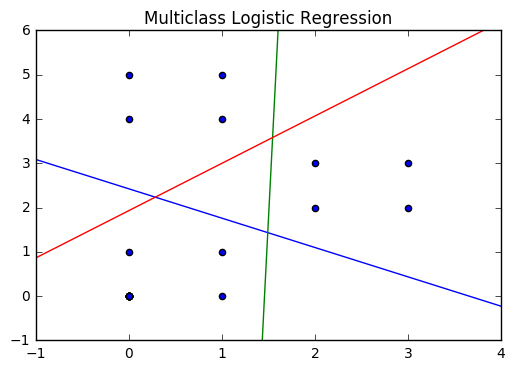

In [20]:
import math
import numpy as np
import matplotlib.pyplot as plt
x_orig = [[0,0], [0,1], [1, 0], [1, 1], [2, 2], [2, 3], [3, 2], [3, 3], [0, 4], [1, 4], [0, 5], [1, 5]]
y_orig = [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2]
x = np.atleast_2d(x_orig)
y = np.atleast_2d(y_orig).T

def h(X, theta):
    return 1 / (1 + np.exp(-mul(X, theta)))

def j(X, y, theta):
    return (-1/m) * (mul(y.T, np.log(h(X, theta))) + mul((1-y).T, np.log(1-h(X, theta))))

def update(X, y, theta):
    return theta - (alpha/m * mul(X.T, (h(X, theta) - y)))

theta_all = []
for _ in range(3):
    theta = np.random.randint(1, 100, size=(3, 1))/ 100
    mul = np.matmul
    alpha = 0.6
    m = len(x)
    x = np.atleast_2d(x_orig)
    y = np.atleast_2d(y_orig).T
    idx_0 = np.where(y!=_)
    idx_1 = np.where(y==_)
    y[idx_0] = 0
    y[idx_1] = 1
    X = np.hstack((np.ones((len(x), 1)), x))
    prev_j = 10000
    curr_j = j(X, y, theta)
    tolerance = 0.000001
    theta_history = [theta]
    cost_history = [curr_j]

    while(abs(curr_j - prev_j) > tolerance):
        theta = update(X, y, theta)
        theta_history.append(theta)
        prev_j = curr_j
        curr_j = j(X, y, theta)
        cost_history.append(curr_j[0][0])
    theta_all.append(theta)
    print("classifier %d stopping with loss: %.5f" % (_, curr_j[0][0]))

def theta_2(theta, x_range):
    return [(-theta[0]/theta[2] - theta[1]/theta[2]*i) for i in x_range]
x_range = np.linspace(-1, 4, 100)
x = np.atleast_2d(x_orig)
y = np.atleast_2d(y_orig).T
fig, ax = plt.subplots()
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 6)
plt.scatter(x[np.where(y == 2), 0], x[np.where(y == 2), 1])
plt.scatter(x[np.where(y == 1), 0], x[np.where(y == 1), 1])
plt.scatter(x[np.where(y == 0), 0], x[np.where(y == 0), 1])
for theta in theta_all:
    plt.plot(x_range, theta_2(theta, x_range))
plt.title('Multiclass Logistic Regression')
plt.show()